## beginning of guesstimator

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
#As usual, import all the packages required

import numpy as np
import pandas as pd
import pickle as plk

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Testing
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
%matplotlib inline

#Modelling


### Import the dataset and train-test split

In [67]:
dataset_loc = '../../datasets/premier-league/'

In [68]:
hist_res = pd.read_csv(dataset_loc+'/results.csv')

In [69]:
hist_res.head(3)

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007


### Dataset modifications

In [70]:
#Adding help columns

hist_res['season_start_yr'] = hist_res['season'].str[:4]
hist_res['home_goals'] = hist_res['home_goals'].apply(int)
hist_res['away_goals'] = hist_res['away_goals'].apply(int)
hist_res['result'] = hist_res['home_goals'].astype(str)+ ':' +hist_res['away_goals'].astype(str)


In [71]:
hist_res.head()

,home_team,away_team,home_goals,away_goals,result,season,season_start_yr
0,Sheffield United,Liverpool,1,1,1:1,2006-2007,2006
1,Arsenal,Aston Villa,1,1,1:1,2006-2007,2006
2,Everton,Watford,2,1,2:1,2006-2007,2006
3,Newcastle United,Wigan Athletic,2,1,2:1,2006-2007,2006
4,Portsmouth,Blackburn Rovers,3,0,3:0,2006-2007,2006


### Dataset Exploration

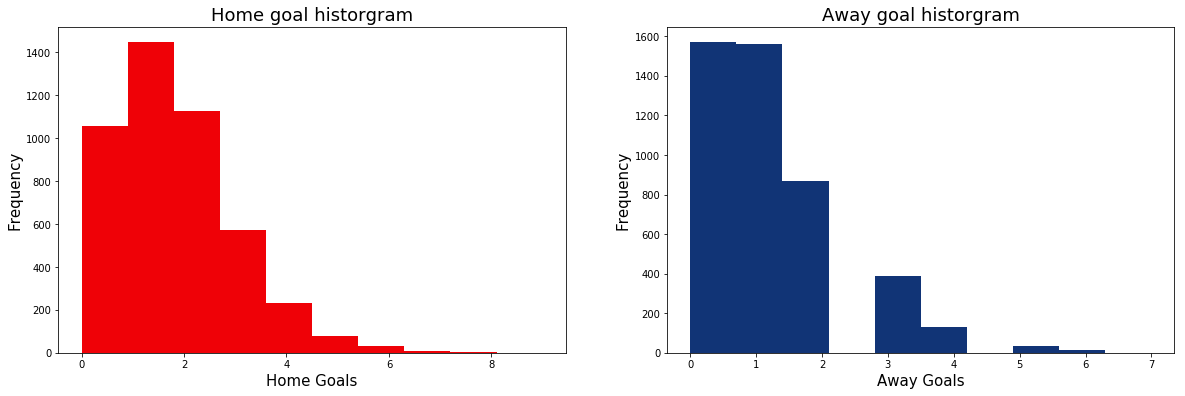

In [96]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.hist(hist_res['home_goals'], color='#EF0107')
plt.title('Home goal historgram', {'fontsize': 18})
plt.xlabel('Home Goals', {'fontsize': 15})
plt.ylabel('Frequency', {'fontsize': 15})

plt.subplot(1, 2, 2)
plt.hist(hist_res['away_goals'], color='#113476')
plt.title('Away goal historgram', {'fontsize': 18})
plt.xlabel('Away Goals', {'fontsize': 15})
plt.ylabel('Frequency', {'fontsize': 15});

In [113]:
#Create a goal count dataset by season
goals_by_season = hist_res[['home_goals', 'away_goals']].groupby(hist_res['season_start_yr']).sum().reset_index()
goals_by_season.head()


,season_start_yr,home_goals,away_goals
0,2006,552,379
1,2007,581,421
2,2008,532,410
3,2009,645,408
4,2010,617,446


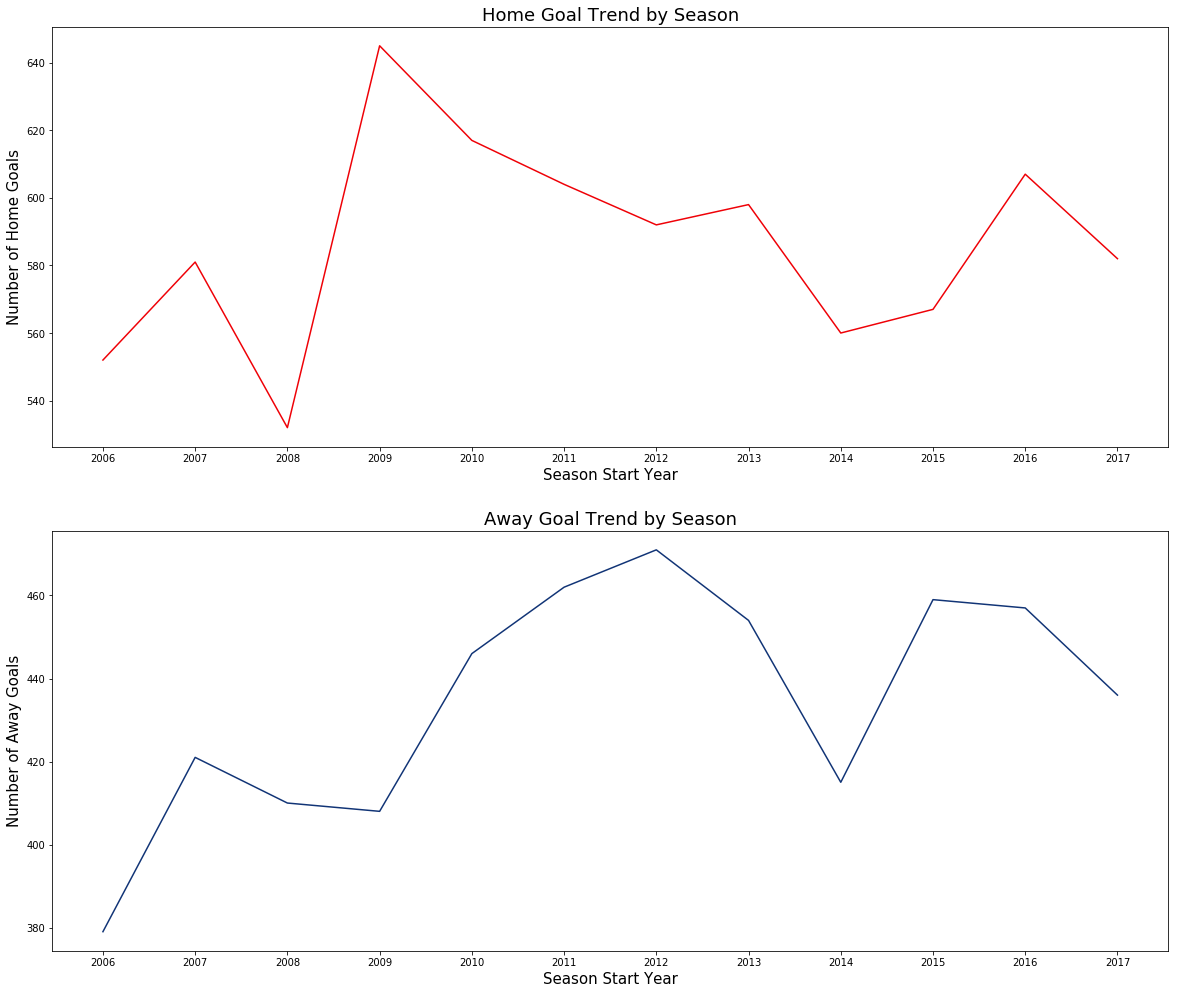

In [124]:
plt.figure(figsize=(20, 17))

plt.subplot(2, 1, 1)
plt.plot(goals_by_season['season_start_yr'], goals_by_season['home_goals'], color='#EF0107')
plt.title('Home Goal Trend by Season', {'fontsize': 18})
plt.xlabel('Season Start Year', {'fontsize': 15})
plt.ylabel('Number of Home Goals', {'fontsize': 15})

plt.subplot(2, 1, 2)
plt.plot(goals_by_season['season_start_yr'], goals_by_season['away_goals'], color='#113476')
plt.title('Away Goal Trend by Season', {'fontsize': 18})
plt.xlabel('Season Start Year', {'fontsize': 15})
plt.ylabel('Number of Away Goals', {'fontsize': 15});